# Dataset Exploration: Loan data from Prosper
## by Francesco Rutigliani

## Preliminary Wrangling

Prosper Marketplace is America's first peer-to-peer lending marketplace, with over $7 billion in funded loans.
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The database last update is: 03/11/2014.

The purpose of this project is to analyze the relationship between multiple variables which could affect the borrower's APR (annual percentage rate) using summary statistics and data visualizations.


In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load Prosper's data set

loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# Verify the structure of the data set

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [4]:
# Create a copy of the original data set to perform data cleaning operations

df = loan.copy()

In [5]:
# Fill null values in 'BorrowerAPR' column with the mean value

df['BorrowerAPR'] = df['BorrowerAPR'].fillna((df['BorrowerAPR'].mean()))

In [6]:
# Drop null values in 'EmploymentStatusDuration' and 'DebtToIncomeRatio' columns

df.dropna(subset = ['EmploymentStatusDuration', 'DebtToIncomeRatio'], inplace = True)

In [7]:
# Verify the cleaned data set

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97888 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             97888 non-null object
ListingNumber                          97888 non-null int64
ListingCreationDate                    97888 non-null object
CreditGrade                            20225 non-null object
Term                                   97888 non-null int64
LoanStatus                             97888 non-null object
ClosedDate                             43374 non-null object
BorrowerAPR                            97888 non-null float64
BorrowerRate                           97888 non-null float64
LenderYield                            97888 non-null float64
EstimatedEffectiveYield                77543 non-null float64
EstimatedLoss                          77543 non-null float64
EstimatedReturn                        77543 non-null float64
ProsperRating (numeric)                77543 non-null float64
ProsperRating (Alpha)          

In [8]:
# Replace numeric codes in 'ListingCategory (numeric)'' column with descriptions 

df.replace({'ListingCategory (numeric)': {0: 'Not Available',       
                                          1: 'Debt Consolidation',
                                          2: 'Home Improvement',
                                          3: 'Business',
                                          4: 'Personal Loan',
                                          5: 'Student Use',
                                          6: 'Auto',
                                          7: 'Other',
                                          8: 'Baby&Adoption',
                                          9: 'Boat',
                                          10: 'Cosmetic Procedure',
                                          11: 'Engagement Ring',
                                          12: 'Green Loans',
                                          13: 'Household Expenses',
                                          14: 'Large Purchases',
                                          15: 'Medical/Dental',
                                          16: 'Motorcycle',
                                          17: 'RV',
                                          18: 'Taxes',
                                          19: 'Vacation',
                                          20: 'Wedding Loans',}}, inplace = True)

In [9]:
# Rename the column 'ListingCategory (numeric)' to 'ListingCategory'

df.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)

In [10]:
# Verify the results

df['ListingCategory'][:5]

0         Not Available
1      Home Improvement
3            Motorcycle
4      Home Improvement
5    Debt Consolidation
Name: ListingCategory, dtype: object

## Univariate Exploration

This section explores some general characteristics of the loans and borrowers. What is the average amount borrowers take and at which interest? How much time do they need to repay it? Where do borrowers live? How much do they earn and do they have other debts?

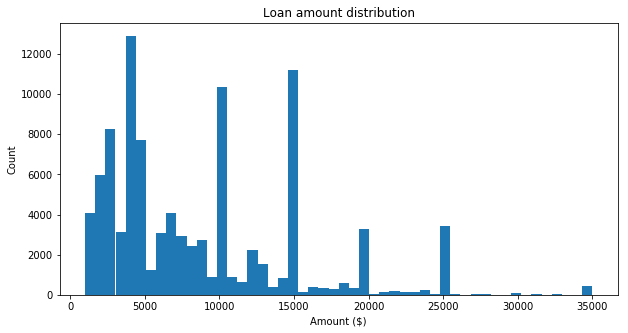

In [11]:
# Visualize loan amount distribution

plt.figure(figsize = (10, 5))
plot1 = df.LoanOriginalAmount.plot(kind = "hist", title = 'Loan amount distribution',  bins = 50)
plot1.set(xlabel = "Amount ($)", ylabel = "Count");

In [12]:
df.LoanOriginalAmount.describe()

count    97888.000000
mean      8695.129996
std       6359.466815
min       1000.000000
25%       4000.000000
50%       7000.000000
75%      12500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

Loan amount varies from 1,000 to 35,000 $. 
The majority of loans have an amount < 15,000 S.

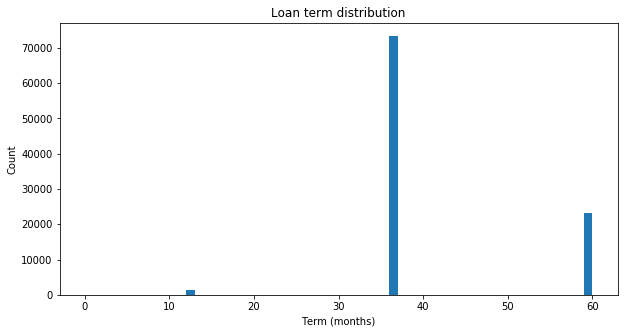

In [13]:
# Visaulize loan term distribution

plt.figure(figsize = (10, 5))
bin_edges = np.arange(0, df['Term'].max()+1, 1)
plt.hist(data = df, x = 'Term', bins = bin_edges)
plt.title('Loan term distribution')
plt.xlabel('Term (months)')
plt.ylabel('Count');

Loans have a fixed term: 1, 3 or 5 years. 3 years is the most common.

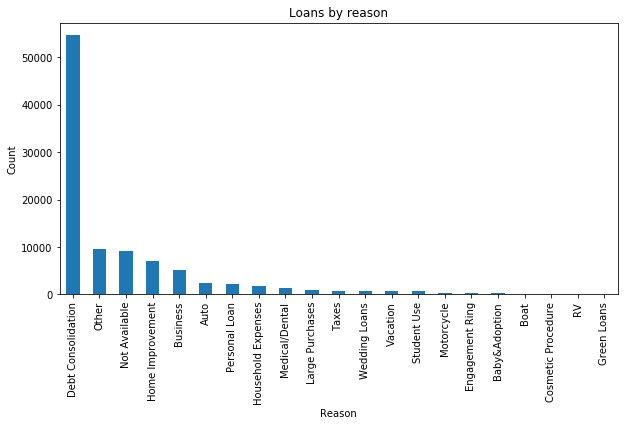

In [14]:
# Visualize loans by reason 

plt.figure(figsize = (10, 5))
plot3 = df['ListingCategory'].value_counts().plot(kind = 'bar', title = 'Loans by reason', colormap = 'tab10')
plot3.set(xlabel = 'Reason', ylabel = 'Count');

The main reason to contract a loan is debt consolidation.

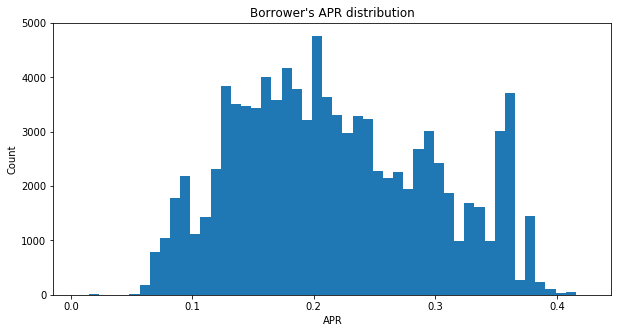

In [15]:
# Visualize borrower's APR distribution

plt.figure(figsize = (10, 5))
plot4 = df.BorrowerAPR.plot(kind = "hist", title = "Borrower's APR distribution", bins = 50)
plot4.set(xlabel = "APR", ylabel = "Count");

In [16]:
df.BorrowerAPR.describe()

count    97888.000000
mean         0.217561
std          0.080074
min          0.006530
25%          0.155380
50%          0.207350
75%          0.280320
max          0.423950
Name: BorrowerAPR, dtype: float64

Borrower's APR is close to a normal distribution. The average value is 21.76%.

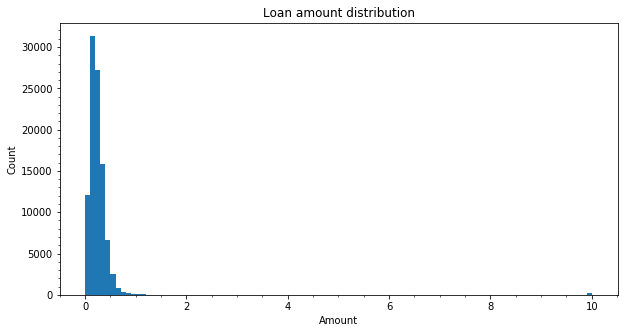

In [17]:
#Visualize debt/income distribution

plt.figure(figsize = (10, 5))
plot5 = df.DebtToIncomeRatio.plot(kind = "hist", title = 'Loan amount distribution', bins=100)
plot5.set(xlabel = "Amount", ylabel = "Count")
plt.minorticks_on();

In [18]:
df.DebtToIncomeRatio.describe()

count    97888.000000
mean         0.276031
std          0.524558
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

Debt to income ratio value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

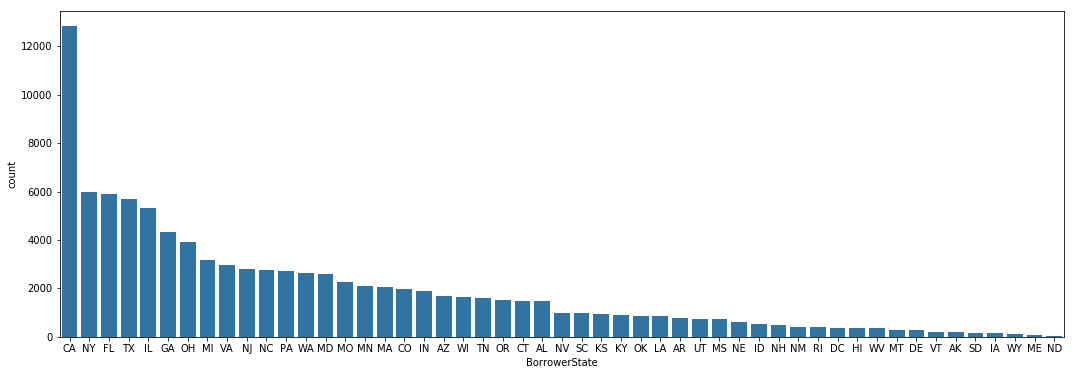

In [19]:
# Visualize borrowers by state

plt.figure(figsize = (18, 6))
base_color = sb.color_palette()[0]
cat_order = df['BorrowerState'].value_counts().index
sb.countplot(data = df, x = 'BorrowerState', color = base_color, order = cat_order);

California, New York, Florida, Texas and Illinois are the top states.

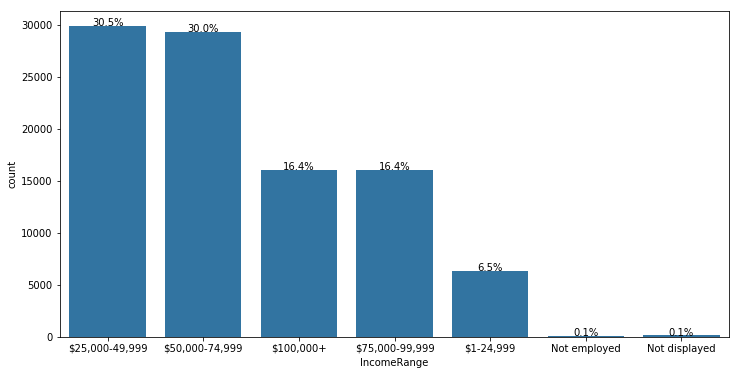

In [20]:
# Visualize income range distribution

plt.figure(figsize = (12, 6))

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'IncomeRange', color = base_color)

n_points = df.shape[0]
cat_counts = df['IncomeRange'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):

    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    plt.text(loc, count-10, pct_string, ha = 'center', color = '0')

About 84% of borrowers earn less than 100,000 $.

In [21]:
# Create a new column to display employmnet duration in years

df['EmploymentStatusDurationYY'] = df['EmploymentStatusDuration']/12

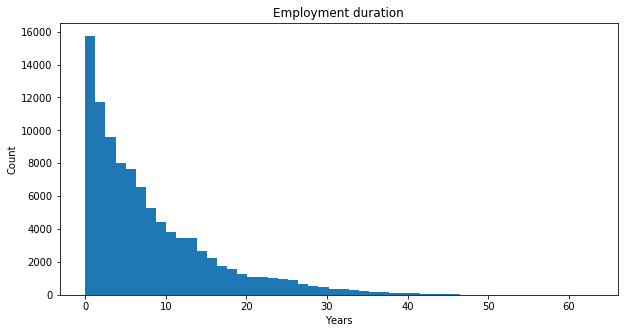

In [22]:
# Visualize employment duration distribution

plt.figure(figsize = (10, 5))
plot8 = df.EmploymentStatusDurationYY.plot(kind = "hist", title = 'Employment duration', bins = 50)
plot8.set(xlabel = "Years", ylabel = "Count");

In [23]:
df.EmploymentStatusDurationYY.describe()

count    97888.000000
mean         8.076585
std          7.853755
min          0.000000
25%          2.166667
50%          5.666667
75%         11.583333
max         62.916667
Name: EmploymentStatusDurationYY, dtype: float64

Most of borrowers have an employment duration less than 12 years.

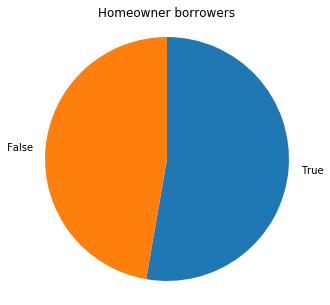

In [24]:
# Visualize how many borrowers are homeowner 

plt.figure(figsize = (10, 5))
sorted_counts = df['IsBorrowerHomeowner'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.title('Homeowner borrowers')
plt.axis('square');

A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner. More than an half of borrowers is homeowner.

## Bivariate Exploration

This section investigates the relationship between borrower's APR and other variables. In the specific, how did the APR evolved during the years? what is the correlation between APR and loan amount, debt/income ratio, income range, term and employment duration?

In [25]:
# Extract year from 'LoanOriginationDate' column and create a new one

df['Year'] = df.LoanOriginationDate.str.slice(start = 0, stop = 4)

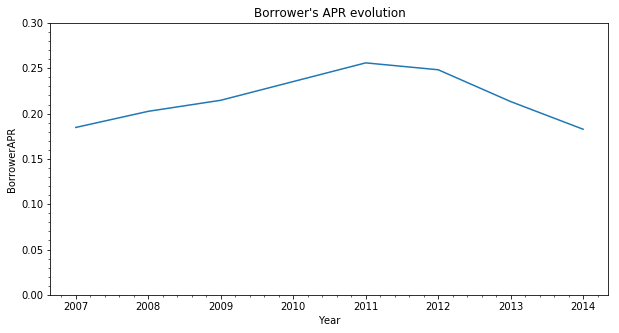

In [26]:
# Visualize borrower's APR over the time

plt.figure(figsize = (10, 5))
sb.lineplot(data = df, x = 'Year', y = 'BorrowerAPR', ci = None).set_title("Borrower's APR evolution")
plt.ylim(0, 0.3)
plt.minorticks_on()

In [27]:
df.groupby(by='Year').BorrowerAPR.mean()

Year
2007    0.184726
2008    0.202519
2009    0.214713
2010    0.235364
2011    0.255993
2012    0.248400
2013    0.213293
2014    0.182748
Name: BorrowerAPR, dtype: float64

APR increased steadily from 2007 till 2011 then the trend changed.

C:\Users\franc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


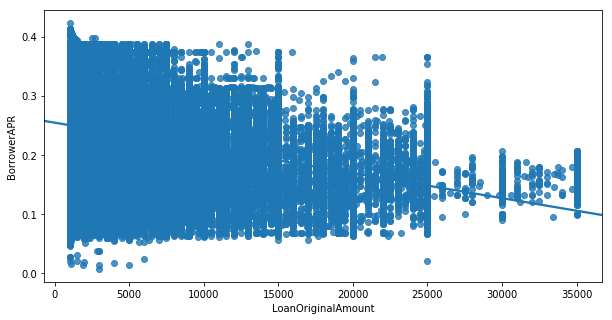

In [28]:
# Visualize the correlation between APR and loan amount

plt.figure(figsize = (10, 5))
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR');

There is a negative correlation between APR and loan amount. However, there is a significant variability for loan < 15,000 $.

C:\Users\franc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


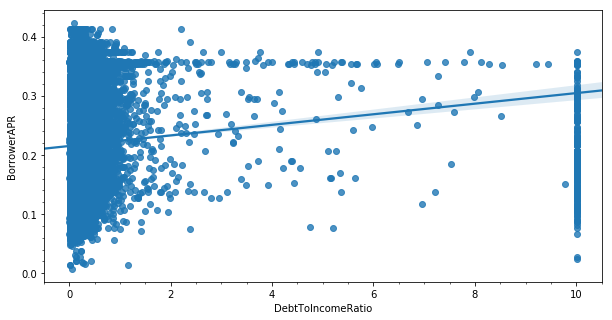

In [29]:
# Visualize the correlation between APR and debt to income ratio

plt.figure(figsize = (10, 5))
sb.regplot(data = df, x = 'DebtToIncomeRatio', y = 'BorrowerAPR');
plt.minorticks_on()

There is a positive correlation between APR and debt to income ratio. However, there is a significant variability for lower debt/income values.

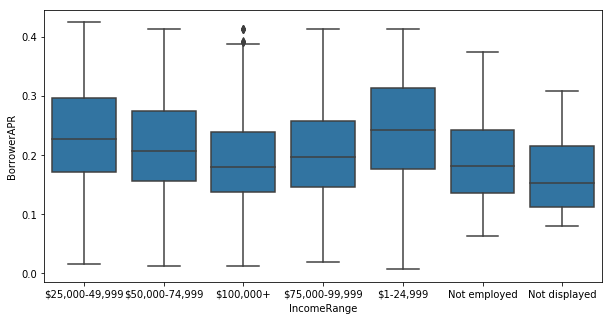

In [30]:
# Visualize the relationship between APR and income range

plt.figure(figsize = (10, 5))
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'IncomeRange', y = 'BorrowerAPR', color = base_color);

APR tends to be higher for lower income ranges. Curiously, not employed borrowers seem to get lower interest rates.

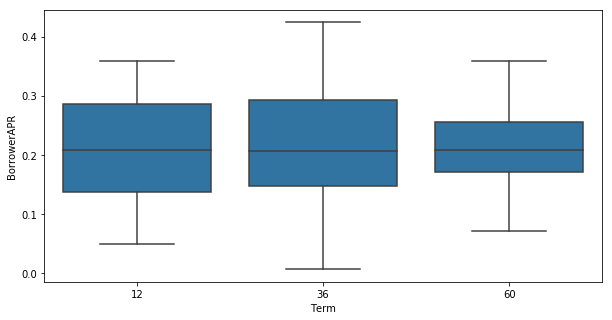

In [31]:
# Visualize the relationship between APR and loan term

plt.figure(figsize = (10, 5))
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'Term', y = 'BorrowerAPR', color = base_color);

There is not a significant relationship between loan term and APR.

C:\Users\franc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


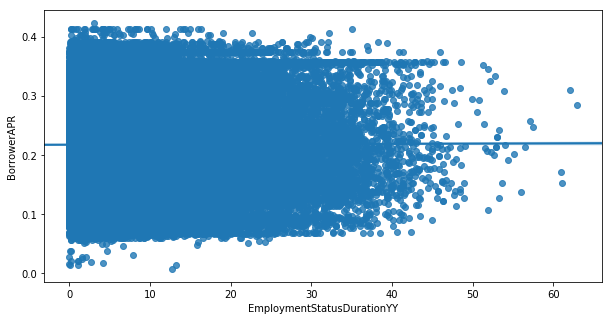

In [32]:
# Visualize the correlation between APR and employment duration

plt.figure(figsize = (10, 5))
sb.regplot(data = df, x = 'EmploymentStatusDurationYY', y = 'BorrowerAPR');

There is not a clear correlation between APR and employment duration.

## Multivariate Exploration

This section investigates further the relationship between borrower's APR and its financial situation. Are homeowners paying a lower interest rate?

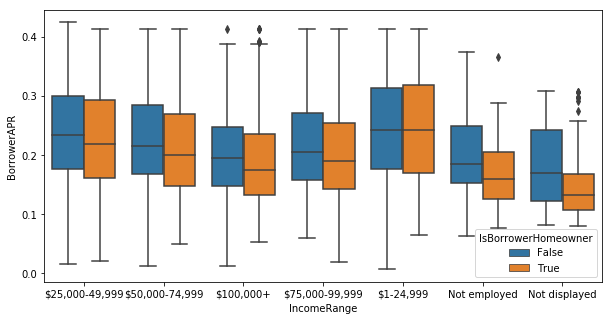

In [33]:
# Visualize the relationship between APR income range and home owners

plt.figure(figsize = (10, 5))
sb.boxplot(data = df, x = 'IncomeRange', y = 'BorrowerAPR', palette = 'tab10', hue = 'IsBorrowerHomeowner');

Being classfied as homeowner helps to get lower interest rates except fot incomes < 25,000 $.

## Conclusions

From the analysis of the data set has emerged that APR decreases when income range and loan amount are higher or borrower is homeowner. 
On the other hand, there is a positive correlation between APR and debt to income ratio meaning that the interest rate increases when the ratio is higher. 
Interestingly, loan term seems to not significantly affect the APR.

